<a href="https://colab.research.google.com/github/razreshili/esg-embedding-model/blob/main/plot_10_sentences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisities

In [ ]:
! pip install -U sentence-transformers
! pip install peft
! pip install wandb
! pip install peft
! pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
import wandb
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import numpy as np

from peft import PeftModel

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# Connect to wandb
! wandb login YOUR_WANDB_TOKEN

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Load trained model

In [ ]:
run = wandb.init()

artifact = run.use_artifact('esg-x-ml/esg-embeddings-compare/model-ia3-proper-run-on-with-hard-negatives:v22', type='model')
#artifact = run.use_artifact('esg-x-ml/esg-embeddings/model-run-on-new-adjacent-dataset-with-larger-batch-smaller-lr:v11', type='model')
artifact_dir = artifact.download()

run.finish()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: arina-zemchik (esg-x-ml). Use `wandb login --relogin` to force relogin


wandb:   9 of 9 files downloaded.  


In [ ]:
base_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", device="cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
model = PeftModel.from_pretrained(base_model, artifact_dir, device="cuda") # add is_trainable=True in arguments to resume training

In [ ]:
model.eval()

PeftModel(
  (base_model): IA3Model(
    (model): SentenceTransformer(
      (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
      (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
      (2): Normalize()
    )
  )
)

## Load again base model because it overrides

In [ ]:
base_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2", device="cuda")

# Plotting

In [ ]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Define sentences and labels
sentences_dict = {

    "environmental": [
        "To achieve a further reduction in CO2 emissions, the focus is on the utilisation phase of vehicles, which account for 70 percent of the BMW Group’s CO2 footprint. By 2030, the CO2 emissions per vehicle and kilometre driven will be at least halved from 2019 levels.",
        "That is why the BMW Group is pursuing the vision of a circular economy, with the aim of keeping raw materials in the cycle for as long as possible. The BMW i Vision Circular demonstrates in very tangible form, how a vehicle can be produced using 100 percent secondary materials – and where the challenges lie. Going forward, the company aims to significantly increase this share in the future.",
        "Annual sales of electric and electrified BMW vehicles continue to grow from year to year."
    ],
    "social": [
        "With a wide range of options for continuing education, especially in innovation areas such as digitalisation and electrification, we are investing in the performance capabilities and employability of our more than 120,000 colleagues – today, and in the future.",
        "Our work focuses, in particular, on supporting gender equality and countering violent extremism, hatred and prejudice, as well as on promoting social cohesion and diversity through the arts, culture and sports. The selected organisations not only receive financial support, but also get the chance to participate in a one-year capacity-building programme in partnership with Accenture.",
        "We foster the education of children and young people because we know it’s key to a successful future, and with our activities in the fields of sports and culture, we reach out to people across the globe."
    ],
    "governance": [
        "We source components, materials and services from a large number of production and delivery locations, and our suppliers are bound by contract to meet our sustainability standards by ensuring the social and environmental due diligence specifications in our agreement are met.",
        "If we have reason to suspect that a Tier 1 supplier of ours (holding a direct contract with us), or a sub-supplier (not holding a direct contract with the BMW Group) may be in breach of these standards, we launch preventive and remediation measures. These are systematically established in our processes.",
        "The BMW Group is committed to upholding environmental and social standards across our supplier network. This includes a particular focus on human rights, the associated environmental standards and our own ethical principles. A key point is the management of raw materials, where our priority is to ensure responsible extraction."
    ],

    "non-esg": [
        "Today, the BMW Group is the world’s leading manufacturer of premium cars and motorcycles and a provider of premium financial and mobility services. We operate over 30 production sites around the world and a global sales network."
    ]
}


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


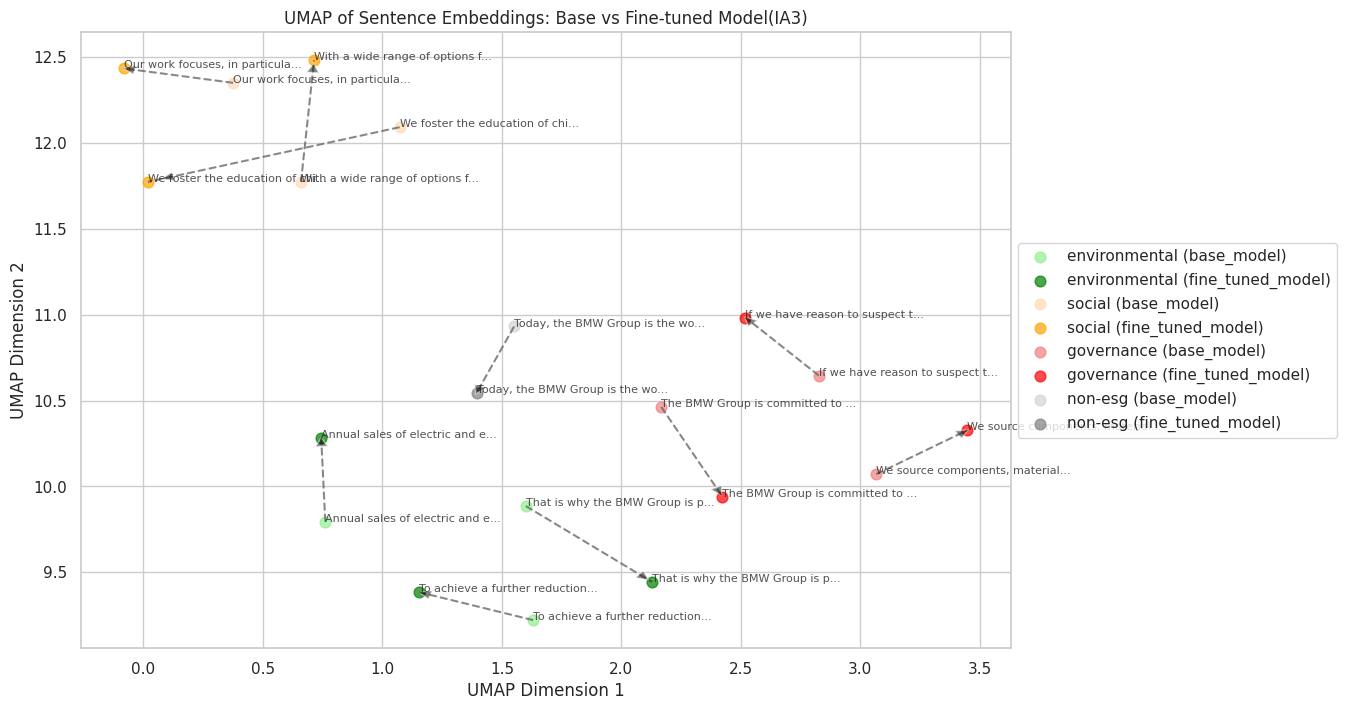

In [ ]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define colors for plotting
colors = {
    ("governance", "base_model"): "lightcoral",
    ("governance", "fine_tuned_model"): "red",
    ("social", "base_model"): "peachpuff",
    ("social", "fine_tuned_model"): "orange",
    ("environmental", "base_model"): "lightgreen",
    ("environmental", "fine_tuned_model"): "green",
    ("non-esg", "base_model"): "lightgrey",
    ("non-esg", "fine_tuned_model"): "grey"
}

# Flatten the dictionary for processing
sentences, labels, model_types = [], [], []
for label, sents in sentences_dict.items():
    for sent in sents:
        sentences.append(sent)
        labels.append(label)

# Get sentence embeddings for both models
base_embeddings = base_model.encode(sentences)
fine_tuned_embeddings = model.encode(sentences)

# Stack embeddings for UMAP
embeddings = np.vstack([base_embeddings, fine_tuned_embeddings])
embedding_labels = labels * 2  # Duplicate labels for both model types
model_types = ["base_model"] * len(labels) + ["fine_tuned_model"] * len(labels)

# Dimensionality reduction
umap_embeddings = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=42).fit_transform(embeddings)

# Create plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Store indices of plotted points for arrows
base_indices = []
fine_tuned_indices = []

# Plot points and annotate sentence beginnings
for label in sentences_dict.keys():
    for model_type in ["base_model", "fine_tuned_model"]:
        indices = [j for j in range(len(embedding_labels)) if embedding_labels[j] == label and model_types[j] == model_type]
        if model_type == "base_model":
            base_indices.extend(indices)
        else:
            fine_tuned_indices.extend(indices)

        plt.scatter(umap_embeddings[indices, 0], umap_embeddings[indices, 1],
                    c=colors[(label, model_type)], label=f"{label} ({model_type})", s=60, alpha=0.7)

        # Annotate points with sentence beginnings
        for idx in indices:
            plt.text(umap_embeddings[idx, 0], umap_embeddings[idx, 1], sentences[idx % len(sentences)][:30] + "...",
                     fontsize=8, alpha=0.8)

# Draw dashed lines to indicate change in embeddings from base_model to fine-tuned_model
for base_idx, fine_tuned_idx in zip(base_indices, fine_tuned_indices):
    # Get the start and end coordinates
    start = umap_embeddings[base_idx]
    end = umap_embeddings[fine_tuned_idx]

    # Draw a dashed line
    plt.plot([start[0], end[0]], [start[1], end[1]], 'k--', alpha=0.5)  # 'k--' creates a dashed black line
        # Draw a small arrow at the end of the line
    arrow_direction = end - start
    plt.arrow(start[0], start[1], arrow_direction[0] * 0.9, arrow_direction[1] * 0.9,
              head_width=0.05, head_length=0.05, fc='black', ec='white', alpha=0.5)


# Move the legend outside the plot area
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("UMAP of Sentence Embeddings: Base vs Fine-tuned Model(IA3)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.savefig("sentence_embeddings_plot_arrows.png", dpi=300, bbox_inches='tight')
plt.show()
